In [23]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [24]:
env = BlackjackEnv()

In [25]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below) {s}x[a]
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA. [a]
    
    """
    def policy_fn(observation):
        # a policy that assigns a probabilty to all actions at the state
        A = np.zeros(nA)
        A +=  epsilon/nA
        best_action_idx = np.argmax(Q[observation])
        A[best_action_idx] += (1.0 - epsilon)
        return A
        # Implement this!
    
    return policy_fn

In [54]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i in range(1, num_episodes+1):

        if i % 10000 == 0:
            print('Episode number: {}'.format(i))
        state = env.reset()
        episode = []
        while True:
            probs = policy(state)
            action = np.random.choice(np.arange(env.action_space.n), p = probs)
            next_state, reward, done, _  = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
            
        unique_state_actions = set([(x[0], x[1]) for x in episode])
        for state, action in unique_state_actions:
            first_state_idx = np.argmax([((state == x[0])&(action == x[1])) for x in episode])
            if ((state != episode[0][0])|(action != episode[0][1]))&(first_state_idx==0):
                break
            G = np.sum([(x[2]*discount_factor**t) for t, x in enumerate(episode[first_state_idx:])])
            returns_sum[(state, action)] += G
            returns_count[(state, action)] += 1
            Q[state][action] = returns_sum[(state, action)]/returns_count[(state, action)]
        
    # Implement this!
    
    return Q, policy

In [55]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

Episode number: 10000
Episode number: 20000
Episode number: 30000
Episode number: 40000
Episode number: 50000
Episode number: 60000
Episode number: 70000
Episode number: 80000
Episode number: 90000
Episode number: 100000
Episode number: 110000
Episode number: 120000
Episode number: 130000
Episode number: 140000
Episode number: 150000
Episode number: 160000
Episode number: 170000
Episode number: 180000
Episode number: 190000
Episode number: 200000
Episode number: 210000
Episode number: 220000
Episode number: 230000
Episode number: 240000
Episode number: 250000
Episode number: 260000
Episode number: 270000
Episode number: 280000
Episode number: 290000
Episode number: 300000
Episode number: 310000
Episode number: 320000
Episode number: 330000
Episode number: 340000
Episode number: 350000
Episode number: 360000
Episode number: 370000
Episode number: 380000
Episode number: 390000
Episode number: 400000
Episode number: 410000
Episode number: 420000
Episode number: 430000
Episode number: 4400

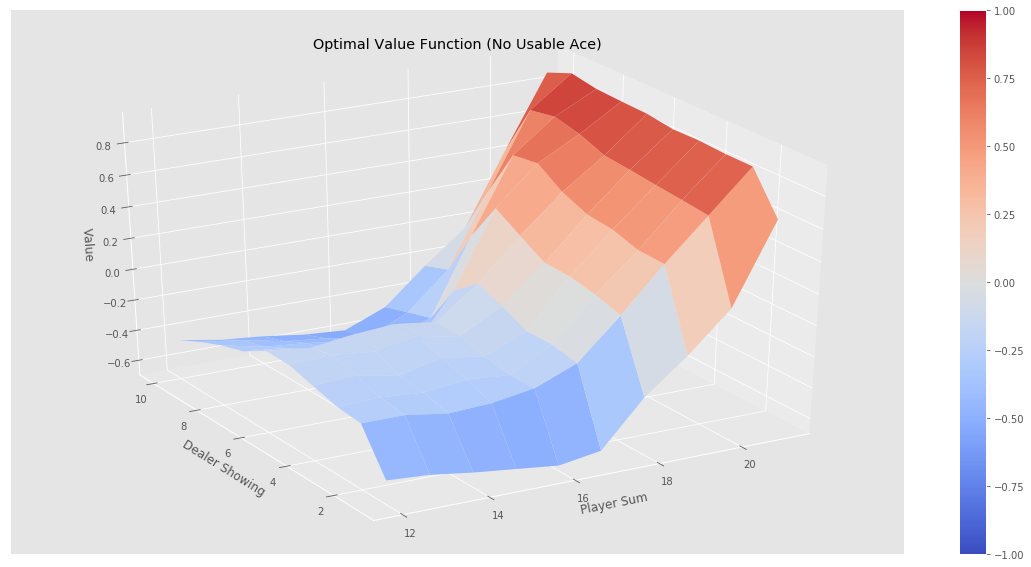

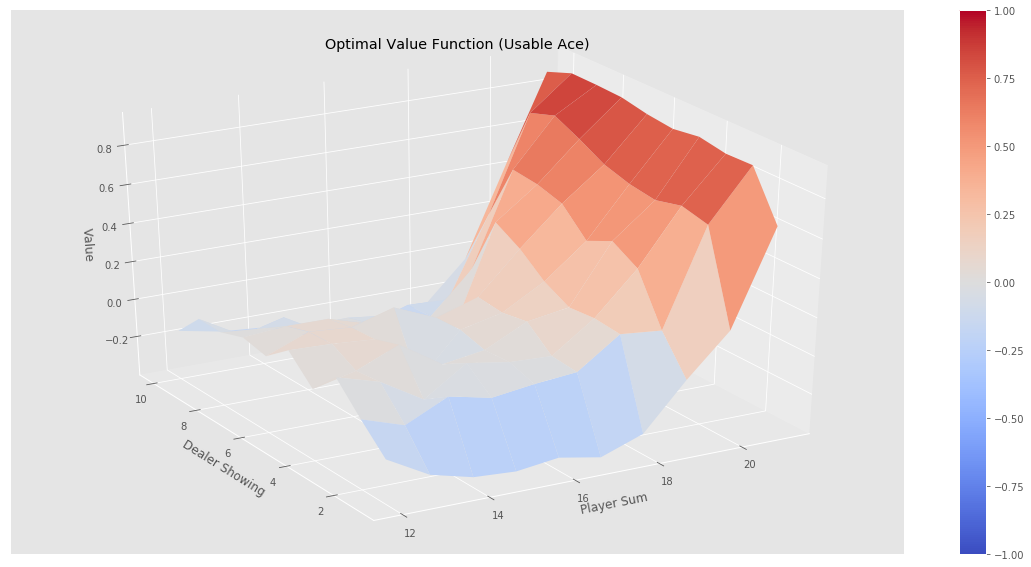

In [56]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")